<a href="https://colab.research.google.com/github/bhagyashridhavale/Netflix-Movies-and-Tv-shows-clustering/blob/main/Netflix_Movies_and_Tv_Shows_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - 



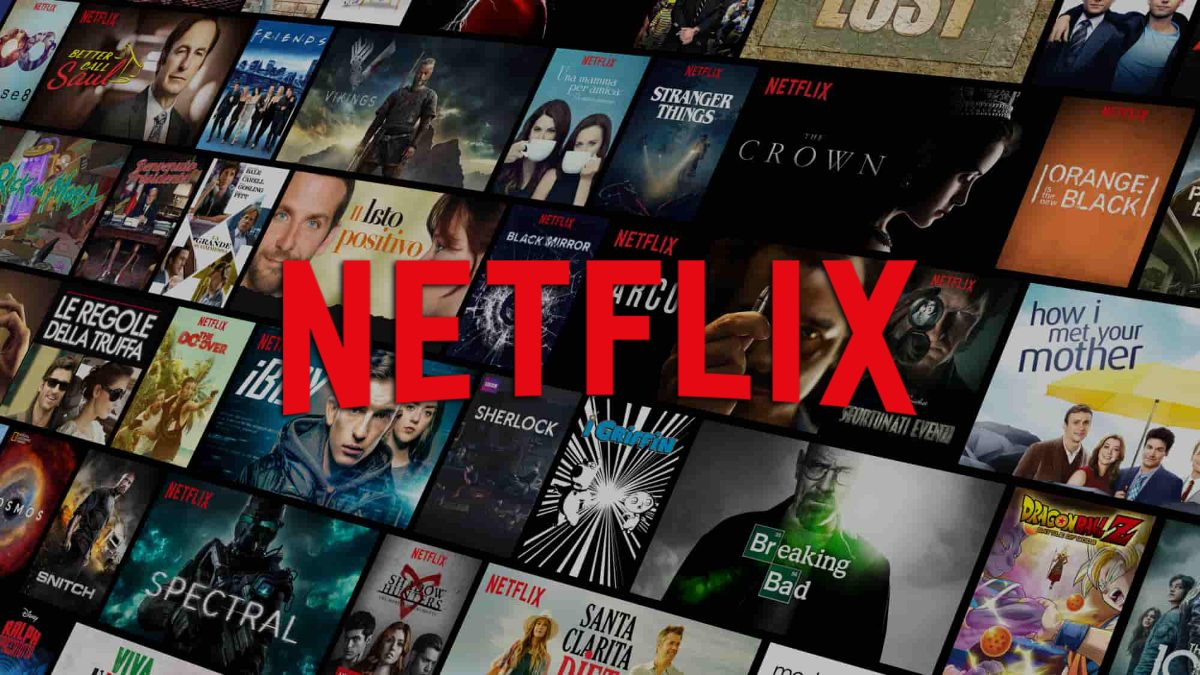

##### **Project Type**    - Netflix Movies and Tv Shows Clustering/Unsupervised Machine Learning
##### **Contribution**    - Individual
##### **Name -**          - Bhagyashri Ramesh Dhavale

# **Project Summary -**

***Data understanding.***

***EDA***

***Fearure engineering***

***NLP***

***Unsupervised machine learning clustering algorithm.***

***1.Elbo-method***

***2.Dendrogram***

***3.Agglomerative clustering.***

# **GitHub Link -**

https://github.com/bhagyashridhavale/Netflix-Movies-and-Tv-shows-clustering

# **Problem Statement**


**This dataset consist of tv shows and movies available on netflix as of 2019.The dataset is collected from flixable which is third-party netflix search engine.In 2018 , they released an interesting report which shows that the nuber of TV shows on netflix has nearly tripled since 2010.The streming service's number of movies has decreased by more than 2,000.while its number of TV shows has nearly tripled.It will be interresting to explorewhat all insights can be obtained from the same dataset.**


# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries

import pandas as pd
import numpy as np
import time
import datetime
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.neural_network import MLPRegressor
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn import neighbors
from sklearn.svm import SVR
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import ensemble
from wordcloud import WordCloud,ImageColorGenerator
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

# ignoring warnings.
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Unsupervised machine learning/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.csv")

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

In [ ]:
df.columns

### Dataset Information

In [ ]:
# Dataset Info
df.info()

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df[df.duplicated()]

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
# Missing Value Count Function
def show_missing():
    missing = df.columns[df.isnull().any()].tolist()
    return missing

# Missing data counts and percentage
print('Missing Data Count')
print(df[show_missing()].isnull().sum().sort_values(ascending = False))
print('--'*50)
print('Missing Data Percentage')
print(round(df[show_missing()].isnull().sum().sort_values(ascending = False)/len(df)*100,2))

In [ ]:
# Visualizing the missing values

plt.rcParams['figure.figsize'] = (15, 10)
sns.heatmap(df.isnull(), yticklabels=False, cbar=True, cmap='BuPu')

In [ ]:
# looking how many values are missing.

def missing_zero_values_table(df):
  zero_val = (df == 0.00).astype(int).sum(axis=0)
  mis_val = df.isnull().sum()
  mis_val_percent = 100 * df.isnull().sum()/len(df)
  mz_table = pd.concat([zero_val,mis_val,mis_val_percent],axis=1)
  mz_table = mz_table.rename(
  columns = {0 : 'Zero Values' , 1 : 'Missing Values' , 2 : '% of Total Values'})
  mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
  mz_table['% Total Zero Missing Values'] = 100 * mz_table["Total Zero Missing Values"]/len(df)
  mz_table['Data Type'] = df.dtypes
  mz_table = mz_table[
      mz_table.iloc[:,1] !=0].sort_values(
  '% of Total Values',ascending=False).round(1)
  print (" Your selected dataframe has " + str (df.shape[1]) + " columns and " + str (df.shape[0]) + " Rows.\n "
      " There are " + str (mz_table.shape[0]) +
          " columns that have missing values . " )
#    mz_table.to_excel('D:/sampledata/missing_and_zero_values.xlsx',freeze_panes=(1,0),index=False)
  return mz_table
missing_zero_values_table(df)

### What did you know about your dataset?

***1.Importing all libraries***

***2.7787 rows and 12 columns.***

***3.No duplicated values.***

***4.There are 5 columns have missing values.***

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

In [ ]:
# Dataset Describe
df.describe(include='all')

### Variables Description 

***1.show_id:Unique ID forevery movie/tv shows.***

***2.type:Identifier-A Movie or Tv shows.***

***3.title:Title of the movie/tv shows.***

***4.director:Director of the movie.***

***5.cast:Actors involved in the movie/show was produced.***

***6.country:Country where the movie/show was produced.***

***7:date_added:Date it was added on netflix.***

***8.release_year:Actual release year of the movie /show.***

***9.rating:Tv rating of the movie/show.***

***10.duration:Total duration-In minute or number of season.***

***11.listed_in:genere.***

***12.description:The summary description.***

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No.of unique values in",i,"is",df[i].nunique(),".")

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
df.isnull().sum()

In [ ]:
# handling null values.

df['cast'].fillna(value='No Cast',inplace=True)
df['country'].fillna(value=df['country'].mode()[0],inplace=True)

In [ ]:
# date_added and contain will drop them from dataset.
df.dropna(subset=['date_added','rating'],inplace=True)

In [ ]:
# dropping director column.

df.drop(['director'],axis=1,inplace=True)

In [ ]:
df.isnull().sum()

### What all manipulations have you done and insights you found?

***1.There are 3631 null values in the dataset.***

***2.2389 null values in director column.***

***3.718 null values in cast column.***

***4.507 null values in country column.***

***5.10 in date_added.***

***6.7 in rating.***

***7.We need to handle the null values.***

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [ ]:
# Chart - 1 visualization code
plt.figure(figsize=(10,5))
sns.countplot(x='rating',data=df)

##### 1. Why did you pick the specific chart?

***It Show the counts of observations in each categorical bin using bars.***

##### 2. What is/are the insight(s) found from the chart?

***highest shows are rated by TV-MA,followed by TV-14 and TV-PG***

Answer Here

#### Chart - 2

In [ ]:
df.rating.unique()

In [ ]:
rating_map = {'TV-MA':'Adults',
              'R':'Adults',
              'PG-13':'Teens',
              'TV-14':'Young Adults',
              'TV-PG':'Older Adults',
              'NR':'Adults',
              'TV-G':'Kids',
              'TV-Y':'Kids',
              'TV-Y7':'Older Kids',
              'PG':'Older Kids',
              'G':'Kids',
              'NC-17':'Adults',
              'TV-Y7-FV':'Older Kids',
              'UR':'Adults'}

In [ ]:
df['rating'].replace(rating_map,inplace=True)
df['rating'].unique()

In [ ]:
# Chart - 2 visualization code
#Age rating barplot.

plt.figure(figsize=(10,5))
sns.countplot(x='rating',data=df)

##### 1. Why did you pick the specific chart?

***The countplot is used to represent the occurrence(counts)of the observation present in the categorical variable.***

##### 2. What is/are the insight(s) found from the chart?

***More shows on netflix are produced for adult.and less number of shows for teens.***

***Adults and young adults have more rating count.***

#### Chart - 3

####Univariate Analysis####

In [ ]:
# Chart - 3 visualization code

plt.figure(figsize=(10,5))
df.type.value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.ylabel('')
plt.title('Movies and Tv Shows in the dataset')

##### 1. Why did you pick the specific chart?

***It show the size of items(called wedge)inone data series,proportional to the sum of other items.***

##### 2. What is/are the insight(s) found from the chart?

***Here 69.14% movies and tv shows are 30.86%.***

***compare to tv shows movies are more.***

#### Chart - 4

In [ ]:
tv_shows=df

In [ ]:
# Chart - 4 visualization code
# tv shows ratings.

tv_ratings = tv_shows.groupby(['rating'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False)
fig_dims = (14,7)
fig, ax = plt.subplots(figsize=fig_dims)
sns.pointplot(x='rating',y='count',data=tv_ratings)
plt.title('TV Show Ratings',size='20')
plt.show()

##### 1. Why did you pick the specific chart?

***A point plot represents an estimate of central tendency for a numeric variable by the position of the dot.***

##### 2. What is/are the insight(s) found from the chart?

***We saw huge increase in Tv show ratings.***

#### Chart - 5

In [ ]:
movies = df
movies_year = movies['release_year'].value_counts().sort_index(ascending=False)

In [ ]:
# Chart - 5 visualization code
# movie released year.
plt.figure(figsize=(15,5))
sns.countplot(y=movies['release_year'],data=df,order=movies['release_year'].value_counts().index[0:20])

##### 1. Why did you pick the specific chart?

***Used to represent the occurrence(counts) of the obesrvation present in the categorical variable.***

##### 2. What is/are the insight(s) found from the chart?

***2018 released more movies.***

#### Chart - 6

In [ ]:
# Chart - 6 visualization code
# tv shows released year.
plt.figure(figsize=(15,5))
sns.countplot(y=tv_shows['release_year'],data=df,order=tv_shows['release_year'].value_counts().index[0:20])

##### 1. Why did you pick the specific chart?

***USeful for displaying the distribution of a categorical variable,and it used to visualize the frequency of each category.***

##### 2. What is/are the insight(s) found from the chart?

***2018 yer showing more Tv show released year.***

#### Chart - 7

In [ ]:
country=df

In [ ]:
# Chart - 7 visualization code
plt.figure(figsize=(10,5))
plt.title('Top 10 Genre Movies',fontweight="bold")
sns.countplot(y=movies['listed_in'],data=movies,order=movies['listed_in'].value_counts().index[0:10],palette="cubehelix")

##### 1. Why did you pick the specific chart?

***comparing the mean value of numerical variable across different categories.***

##### 2. What is/are the insight(s) found from the chart?

***Documentaries,stand-up comedy,drama,international movies having more rating counts.***

#### Chart - 8

In [ ]:
# Chart - 8 visualization code
# to tv shows.
plt.figure(figsize=(10,5))
plt.title('Top 10 Genre TV Shows',fontweight="bold")
sns.countplot(y=tv_shows['listed_in'],data=movies,order=tv_shows['listed_in'].value_counts().index[0:10],palette="cubehelix")

##### 1. Why did you pick the specific chart?

***It show the counts of observation.***

##### 2. What is/are the insight(s) found from the chart?

***Documentaries,stand-up comedy,drama,international movies having more Tv show rating counts.***

#### Chart - 9

In [ ]:
# Chart - 9 visualization code
# top country with content.

plt.figure(figsize=(18,5))
sns.countplot(x=df['country'],palette="magma",order=df['country'].value_counts().index[0:15],hue=df['type'])
plt.xticks(rotation=50)
plt.title('Top 10 countries with most contents', fontsize=15, fontweight='bold')
plt.show()

##### 1. Why did you pick the specific chart?

***It shows the relationship between a numeric and categoric variable.***

##### 2. What is/are the insight(s) found from the chart?

***United states has a most content country.***

#### Chart - 10

In [ ]:
# Chart - 10 visualization code
# Top 20 actors netflix
df['cast_name'] = df['cast'].apply(lambda x :  x.split(',')) 
cast_count = []
for i in df['cast_name']: cast_count += i
cast_dict = dict((i, cast_count.count(i)) for i in cast_count)
df_cast_count = pd.DataFrame(cast_dict.values(),cast_dict.keys()).reset_index().sort_values(0,ascending=False).rename(
    columns = {'index' : 'cast_name', 0 : 'count'}).iloc[1:21]
plt.figure(figsize=(15,5))
sns.barplot(x='cast_name',y='count',data=df_cast_count,palette="Dark2")
plt.title("Top-20 ACTORS on Netflix",size='16',fontweight="bold")
plt.xticks(rotation=90)
plt.show()

##### 1. Why did you pick the specific chart?

***Each entity of the categoric variable is represent as a bar,the size of the bar represent its numeric value.***

##### 2. What is/are the insight(s) found from the chart?

***Anupam kher,Takahiro sakural,Om puri are the top actors in count.***

#### Chart - 11

In [ ]:
# Chart - 11 visualization code
all_words = ' '.join([text for text in df['title']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

##### 1. Why did you pick the specific chart?

***Wordcloud is a technique to show which words are the most frequent among given text.***

##### 2. What is/are the insight(s) found from the chart?

***The larger the word in the visual the more common the word in the documents.***

***In above plot Love,Boy,Movie live,Girl House its highlight some words.***

#### Chart - 12

In [ ]:
# Chart - 12 visualization code
# Chart - 7 visualization code
all_words = ' '.join([text for text in df['cast']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

##### 1. Why did you pick the specific chart?

***Present a Low-cost alternative for analyzing text from online surveys.***

##### 2. What is/are the insight(s) found from the chart?

***Michael,cast,Daniel,kim etc are highlighted cast.***

#### Chart - 13

In [ ]:
# Chart - 13 visualization code
plt.figure(figsize=(10,5))
df[~(df['cast']=='Unknown') & (df['type']=='TV Show')].cast.value_counts().nlargest(10).plot(kind='barh')
plt.title('Actors who have appeared in highest number of TV shows')

##### 1. Why did you pick the specific chart?

***show the count.***

##### 2. What is/are the insight(s) found from the chart?

***Actors who have appeared in highest number of TV shows it shows No Cast on plot.***


#### Chart - 14 - Correlation Heatmap

In [ ]:
# Content added yearly, monthly

df['year_added'] = pd.DatetimeIndex(df['date_added']).year
movies['year_added'] = pd.DatetimeIndex(movies['date_added']).year
tv_shows['year_added'] = pd.DatetimeIndex(tv_shows['date_added']).year
df['month_added'] = pd.DatetimeIndex(df['date_added']).month
movies['month_added'] = pd.DatetimeIndex(movies['date_added']).month
tv_shows['month_added'] = pd.DatetimeIndex(tv_shows['date_added']).month

In [ ]:
netflix_year = df['year_added'].value_counts().to_frame().reset_index().rename(columns={'index': 'year','year_added':'count'})
netflix_year = netflix_year[netflix_year.year != 2020]
netflix_year


In [ ]:
# Correlation Heatmap visualization code

month_year_df = df.groupby('year_added')['month_added'].value_counts().unstack().fillna(0).T

plt.figure(figsize=(10,8))
sns.heatmap(month_year_df, linewidths=0.025, cmap="copper_r")
plt.title("Content Heatmap")
plt.ylabel("Month")
plt.xlabel("Year")
plt.show()

##### 1. Why did you pick the specific chart?

***Visualize the strength of relationship between numerical variables.***

##### 2. What is/are the insight(s) found from the chart?

***It shows relationship between monthly and yearly.***

#### Chart - 15 - Pair Plot 

In [ ]:
# Pair Plot visualization code
sns.pairplot(df, hue = 'cast', diag_kind = 'kde',
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size = 4)

##### 1. Why did you pick the specific chart?

***Pairplot creates a nice visualisation and helps us understand the data by summarising a large amount of data in a single figure.***

##### 2. What is/are the insight(s) found from the chart?

***Pairwise relationship between variables within dataset.***

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
df.isnull().sum()

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

In [ ]:
# Checking outliers on release_year column.
sns.boxplot(df.release_year)

In [ ]:
# Replacing outliers with mean value.
release_year_Q1 = df.release_year.quantile(0.25)
release_year_Q3 = df.release_year.quantile(0.75)
release_year_IQR = release_year_Q3 - release_year_Q1
print(f'release_year_Q1 = {release_year_Q1}\nrelease_year_Q3 = {release_year_Q3}\nrelease_year_IQR = {release_year_IQR}')


In [ ]:
release_year_outliers = df[(df.release_year < (release_year_Q1 - 1.5 * release_year_IQR)) |
                           ( df.release_year > (release_year_Q3 + 1.5 * release_year_IQR)) ]


In [ ]:
df["release_year"] = np.where(df["release_year"] <2009, df.release_year.mean(),df['release_year'])


In [ ]:
sns.boxplot(df.release_year)


In [ ]:
sns.boxplot(df.year_added)

In [ ]:
df.boxplot(column="year_added")
plt.show()


In [ ]:
def remove_outlier(col):
  sorted(col)
  q1,q3 = col.quantile([0.25,0.75])
  IQR = q3-q1
  lwr_bound = q1-(1.5*IQR)
  upr_bound = q3+(1.5*IQR)
  return lwr_bound,upr_bound

In [ ]:
low,high=remove_outlier(df["year_added"])

In [ ]:
df["year_added"]=np.where(df["year_added"]>high,high,df["year_added"])

In [ ]:
df["year_added"]=np.where(df["year_added"]<low,low,df["year_added"])

In [ ]:
df.boxplot(column="year_added")

##### What all outlier treatment techniques have you used and why did you use those techniques?

***There haven't any release_year which is greater than 2018.***

***
***Replacing outliers with the extreme values at the first and third quartiles. We have done outlier treatment to prevent high errors that were influenced by outliers. ***

***The following quantities (called fences) are needed for identifying extreme values in the tails of the distribution:***

***lower inner fence: Q1–1.5*IQ***

***upper inner fence: Q3 + 1.5*IQ***

***lower outer fence: Q1–3*IQ***

***upper outer fence: Q3 + 3*IQ***


### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# importing nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
%config InlineBackend.figure_format = 'retina'

In [ ]:
df.dtypes

In [ ]:
df.head()

In [ ]:
# Expand Contraction
df['description'].astype(str)

In [ ]:
# after above all the changes, those features are in list format, so making list of description feature
df['description'] = df['description'].apply(lambda x: x.split(' '))

In [ ]:
# converting text feature to string from list
df['description']= df['description'].apply(lambda x: " ".join(x))
# making all the words in text feature to lowercase
df['description']= df['description'].apply(lambda x: x.lower())

#### 2. Lower Casing

In [ ]:
# Lower Casing
# converting everithing into lower case

def convert_lower(text):
  return text.lower()

In [ ]:
df['description']=df['description'].apply(convert_lower)

In [ ]:
df['description']

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space, 
    # which in effect deletes the punctuation marks 
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)
# applying above function on text feature
df['description']= df['description'].apply(remove_punctuation)

In [ ]:
df['description'][0:10]

#### 4. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

# using nltk library to download stopwords
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
sw=stopwords.words('english')
#Defining stopwords 
def stopwords(text):
    '''a function for removing the stopword'''
    text = [word for word in text.split() if word not in sw]
    # joining the list of words with space separator
    return " ".join(text)
# applying above function on text feature
df['description']=df['description'].apply(stopwords)
# this is how value in text looks like after removing stopwords
df['description'][0]

In [ ]:
# Remove White spaces
description = "In a future where the elite inhabit an island"
print(description.replace(' ',''))

#### 5. Tokenization

In [ ]:
# Tokenization
description = "In a future where the elite inhabit an island"

In [ ]:
from nltk.tokenize import word_tokenize

In [ ]:
result=word_tokenize(description)

In [ ]:
result

#### 6. Text Normalization

In [ ]:
#necessary import for nlp
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
nltk.download('punkt')

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
#stemming
stemmer = SnowballStemmer('english')
stop_words = set(stopwords.words('english'))


In [ ]:
stop_words

##### Which text normalization technique have you used and why?

***Text normalization is the process of transforming text into single canonical form for that i am using stemming technique.***

#### 7. Part of speech tagging

In [ ]:
nltk.download('averaged_perceptron_tagger')

In [ ]:
# POS Taging
final=nltk.pos_tag(result)

In [ ]:
print(final)

#### 8. Text Vectorization

In [ ]:
# Vectorizing Text
# importing TfidVectorizer from sklearn library
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# applying Tfidf Vectorizer
tfidfmodel = TfidfVectorizer(max_features=5000)
X_tfidf = tfidfmodel.fit_transform(df['description'])
X_tfidf.shape

In [ ]:
# convert X into array form for clusterinng
X = X_tfidf.toarray()

###Unsupervised Machine Learning clustering algorithms####

####K-Mean####

In [ ]:
#finding optimal number of clusters using the elbow method  
from sklearn.cluster import KMeans  
wcss_list= []  #Initializing the list for the values of WCSS  
  
#Using for loop for iterations from 1 to 30.  
for i in range(1, 30):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(X)  
    wcss_list.append(kmeans.inertia_)  
plt.plot(range(1, 30), wcss_list)  
plt.title('The Elobw Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss_list')  
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score
#sillhoute score of clusters 
sill = [] 
for i in range(2,30):
    model = KMeans(n_clusters=i,init ='k-means++',random_state=51)
    model.fit(X)
    y1 = model.predict(X)
    score = silhouette_score(X,y1)
    sill.append(score)
    print('cluster: %d \t Sillhoute: %0.4f'%(i,score))

In [ ]:
#Plotting Sillhoute's score
plt.plot(sill,'bs--')
plt.xticks(list(range(0,30)),list(range(2,30)))
plt.grid(),plt.xlabel('Number of cluster')
plt.show()

In [ ]:
#training the K-means model on a dataset  
kmeans = KMeans(n_clusters= 26, init='k-means++', random_state= 42)  
y_predict= kmeans.fit_predict(X)

***Evaluation***

In [ ]:
 #Predict the clusters and evaluate the silhouette score

score = silhouette_score(X, y_predict)
print("Silhouette score is {}".format(score))

In [ ]:
#davies_bouldin_score of our clusters 
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(X, y_predict)

In [ ]:
#Adding a seperate column for the cluster
df["cluster"] = y_predict

In [ ]:
df['cluster'].value_counts()

In [ ]:
fig, ax = plt.subplots(figsize=(15,6))
sns.countplot(x='cluster', hue='type',lw=5, data=df, ax=ax)

In [ ]:
import plotly.express as px

In [ ]:
#SCATTER PLOT FOR CLUSTERS
fig = px.scatter(df, y="description", x="cluster",color="cluster")
fig.update_traces(marker_size=100)
fig.show()

###dendrogram###

In [ ]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize =(8, 8))
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(X, method ='ward')))

###Agglomerative Clustering###

In [ ]:
#Fitting our variable in Agglomerative Clusters
from sklearn.cluster import AgglomerativeClustering
aggh = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')  
aggh.fit(X)
#Predicting using our model
y_hc=aggh.fit_predict(X)

In [ ]:
df_hierarchical =df.copy()
#creating a column where each row is assigned to their separate cluster
df_hierarchical['cluster'] = aggh.labels_
df_hierarchical.head()

***Evaluation***

In [ ]:
#Silhouette Coefficient
print("Silhouette Coefficient: %0.3f"%silhouette_score(X,y_hc, metric='euclidean'))

In [ ]:
#davies_bouldin_score of our clusters 
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(X, y_hc)

***from elbow and sillhoute score ,forming 26 number of clusters***

***cluster 0 has the highest number of datapoints***

# **Conclusion**

***1.From elbow and sillhoute score,optimal of 26 clusters formed , K Means is best for identification than Hierarchical as the evaluation metrics also 
indicates the same.in kmean cluster 0 has the highest number of datapoints
and evnly distributed for other cluster.***

***2.Netflix has 5372 movies and 2398 TV shows,there are more number movies on Netflix than TV shows.***

***3.TV-MA has the highest number of ratings for tv shows i,e adult ratings.***

***4.Highest number of movies released in 2017 and 2018.***

***5.Highest number of movies released in 2020 The number of movies on Netflix is growing significantly faster than the number of TV shows. We saw a huge increase in the number of movies and television episodes after 2015. there is a significant drop in the number of movies and television episodes produced after 2020. It appears that Netflix has focused more attention on increasing Movie content than TV Shows. Movies have increased much more dramatically than TV shows.***

***6.The most content is added to Netflix from october to january.***

***7.Documentaries are the top most genre in netflix which is fllowed by standup comedy and Drams and international movies.***

***8.kids tv is the top most TV show genre in netflix.***

***9.Most of the movies have duration of between 50 to 150.***

***10.Highest number of tv_shows consistig of single season.***

***11.Those movies that have a rating of NC-17 have the longest average duration.***

***12.When it comes to movies having a TV-Y rating, they have the shortest runtime on average.***

***13.Unitated states has the highest number of content on the netflix ,followed by india.***

***14.India has highest number of movies in netflix.***

***15.30% movies released on Netflix.***

***16.70% movies added on Netflix were released earlier by different mode.***

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***